# Stat. Methods of Data Analysis: Exercise 9
## Estimation of signal and background yields

In [76]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
#import scipy 
from scipy.stats import gaussian_kde
import scipy.optimize as so
from scipy.special import erf 

In [45]:
data = pd.read_csv(r'../../notebooks/data/ex9_data.csv.gz')
#np.loadtxt(r'../../notebooks/data/ex9_data.csv.gz', delimiter = ",", skiprows=1)


In [50]:
data["x"]

0      1.162271
1      1.142611
2      1.487702
3      1.214966
4      0.378743
         ...   
599    0.249427
600    1.052465
601    1.383870
602    0.792205
603    0.052228
Name: x, Length: 604, dtype: float64

1. Make a graphical representation of the data using a histogram, without normalising it to 1. This may help you to grasp the relevant range of possible values for $\nu_S$ and  $\nu_B$.

Text(0, 0.5, 'frequency')

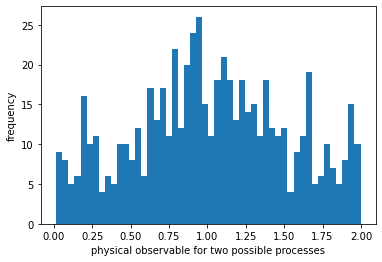

In [4]:
plt.hist(data.x, bins = 50)
plt.xlabel("physical observable for two possible processes")
plt.ylabel("frequency")

2. Write the extended log-likelihood function, as a function of the two parameters $\nu_S$ and  $\nu_B$, using the product of the Poisson distribution for an expected number of events $\nu = \nu_S + \nu_B$and of the pdf $f(x)$. You may drop the constant terms.

### Extended maximum likelihood
The usual maximum likelihood method does not allow for determining the absolute normalisation. 
This can be overcome by using the extended likelihood (for $n$ events, coming from a Poisson distribution with mean 
$\nu$):

$$L(\nu,\theta)=\frac{\nu^n}{n!}e^{-\nu} \prod^n_{i=1}f(x_i;\theta)$$ 

where $\theta$ are the model parameters and $x_i$ the observed values. 
The logarithm of the likelihood then becomes

$$\ln L(\nu,\theta) = −\nu + \sum^n_{i=1} \ln(\nu f(x_i;\theta)) + C$$

where $\nu$ can either be a free parameter or a function of $\theta$. $C$ is independent of $\nu$ and $\theta$ and
can thus be ignored in an optimisation.

In this case

$$f(x) = \frac{\nu_S}{\nu_S + \nu_B}f_S(x) + \frac{\nu_B}{\nu_S + \nu_B}f_B(x)$$

with $f_B(x) = 1/2$ and 
$$f_S(x) = \frac{4}{erf(2\sqrt2)\sqrt{2\pi}}\exp[-\frac12(\frac{x-1}{1/4})^2]$$

I drop the constant terms:
$$\ln L(\nu,\theta) = −\nu_B-\nu_S + \sum^n_{i=1} \ln(\nu_B+\nu_S)(\frac{\nu_S}{\nu_S + \nu_B}f_S(x) + \frac{\nu_B}{\nu_S + \nu_B}f_B(x)) $$ 
$$\ln L(\nu,\theta) = −\nu_B-\nu_S + \sum^n_{i=1} \ln(\nu_Sf_S(x) + \nu_Bf_B(x))$$ 

In [5]:
def f_S(x):
    return(4/(erf(np.sqrt(8))*np.sqrt(2*np.pi))*np.exp(-1/2*(4*(x-1))**2))
def extended_log_likelihood(nu_S, nu_B, x):
    #nu_S, nu_B = param
    f_B = 1/2
    return(-nu_S-nu_B+np.sum(np.log(nu_S* f_S(x) + nu_B* f_B)))

def neg_LLH(nu_S, nu_B, x):
    return(-extended_log_likelihood(nu_S, nu_B, x))

3. Considering the case where the expected number of background events is known to be $\nu_B = 420.7$ (e.g. from an independent measurement), find the maximum likelihood estimate $\hat{\nu_S}$ for $\nu_S$, using a numerical calculation where the range of possible values for $\nu_S$ is not restricted.

In [6]:
nu_S, nu_B = 1, 420.7
optimize = so.minimize(neg_LLH, x0=nu_S, args=(nu_B ,data))
print(optimize)

      fun: -2874.713705769066
 hess_inv: array([[350.52078167]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([179.30432563])


In [7]:
nu_S_hat = optimize["x"][0]
lnL_max = -optimize["fun"]
print(lnL_max ,nu_S_hat)

2874.713705769066 179.30432563125487


 In a Bayesian context, $\hat{\nu_S}$ is the value with maximum posterior probability given the data, assuming a uniform (improper) prior probability distribution for $\nu_S$, i.e. $\pi(\nu_S) = 1$.

4. Make a graphical representation of the variation of the likelihood as a function of $\nu_S$. To do this, make a sample of equally distributed values for $\nu_S$ around the $\hat{\nu_S}$, calculate their log-likelihood values $\ln L(\nu_S)$, and make a plot of $\exp(\ln L(\nu_S) − \ln L_{max})$ as a function of $\nu_S$ , where ln $\ln L_{max} = \ln L(\hat{\nu_S})$ is the maximum log-likelihood value obtained in the estimation. 

In [8]:
#creating a sample of equally distributed values for νS around the νˆS
nu_S_array = np.linspace(0, 2*nu_S_hat, 1000)
LLH_array = []
for nu_S in nu_S_array:
    LLH_array.append(extended_log_likelihood(nu_S,  420.7, data.x))
 

Text(0, 0.5, 'frequency')

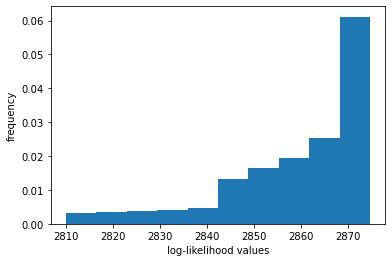

In [9]:
plt.hist(LLH_array, density=True)
plt.xlabel("log-likelihood values")
plt.ylabel("frequency")

In [10]:
def func_of_LLH(LLH_array,lnL_max):
    function = []
    for LLH in LLH_array:
        function.append(np.exp(LLH-lnL_max))
    return function  

Text(0, 0.5, '$\\exp(\\ln L(\\nu_S) − \\ln L_{max})$')

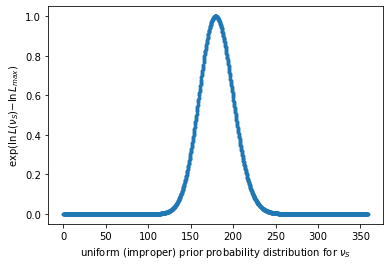

In [11]:
plt.plot(nu_S_array, func_of_LLH(LLH_array,lnL_max), ".")
plt.xlabel(r"uniform (improper) prior probability distribution for $\nu_S$")
plt.ylabel(r"$\exp(\ln L(\nu_S) − \ln L_{max})$")

How would you interpret this plot in a Bayesian context?

In a Bayesian context, $\hat{\nu_S}$ is the value with maximum posterior probability given the data, assuming a uniform (improper) prior probability distribution for $\nu_S$, i.e. $\pi(\nu_S) = 1$.

5. Generate random values for νS uniformly around $\hat{\nu_S}$. Make a histogram of these values weighted by $\exp(\ln L(\nu_S) − \ln L_{max})$, and show it on a plot such that the integral is 1. 

#### density: bool, default: False
If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
If stacked is also True, the sum of the histograms is normalized to 1.

Text(0, 0.5, 'normalized frequency')

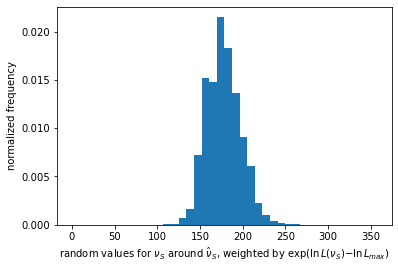

In [12]:
nu_S_random = np.random.uniform(0, 2*nu_S_hat, 1000)
LLH_random = []
for nu_S in nu_S_random:
    LLH_random.append(extended_log_likelihood(nu_S,  420.7, data.x))
plt.hist(nu_S_random, bins = 40, density=True,  weights= func_of_LLH(LLH_random,lnL_max))
plt.xlabel(r"random values for $\nu_S$ around $\hat\nu_S$, weighted by $\exp(\ln L(\nu_S) − \ln L_{max})$")
plt.ylabel("normalized frequency")

What pdf does it represent?

6. Represent the same pdf with a Gaussian kernel estimator using these random value and the associated weights. You may use the scipy.stats.gaussian kde class with the default bandwidth.

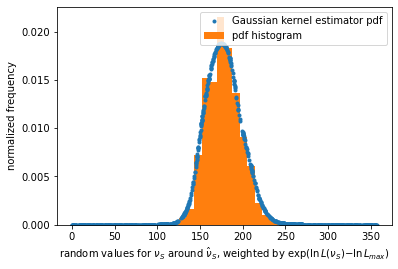

In [18]:
kde = gaussian_kde(nu_S_random, weights = func_of_LLH(LLH_random,lnL_max))
pdf = kde(nu_S_random)
plt.plot(nu_S_random, pdf ,".", label = "Gaussian kernel estimator pdf")
plt.hist(nu_S_random, bins = 40, density=True,  weights= func_of_LLH(LLH_random,lnL_max), label = "pdf histogram")
plt.xlabel(r"random values for $\nu_S$ uniformly distributed $\hat\nu_S$, weighted by $\exp(\ln L(\nu_S) − \ln L_{max})$")
plt.ylabel("normalized frequency")
plt.legend()

7. Using the same techniques, make a representation of the posterior probability for $\nu_S$ given the data, but assuming a different prior distribution, e.g. a Gaussian distribution with mean 350 and standard deviation 50. Compare it to the case where the prior is uniform.

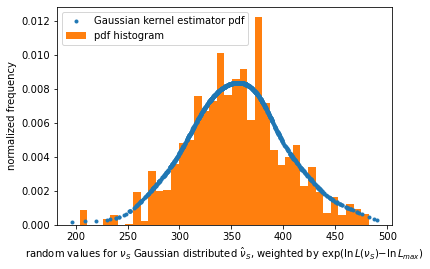

In [21]:
nu_S_random = np.random.normal(loc=350, scale=50, size= 1000)
kde = gaussian_kde(nu_S_random, weights = func_of_LLH(LLH_random,lnL_max))
pdf = kde(nu_S_random)
plt.plot(nu_S_random, pdf ,".", label = "Gaussian kernel estimator pdf")
plt.hist(nu_S_random, bins = 40, density=True,  weights= func_of_LLH(LLH_random,lnL_max), label = "pdf histogram")
plt.xlabel(r"random values for $\nu_S$ Gaussian distributed $\hat\nu_S$, weighted by $\exp(\ln L(\nu_S) − \ln L_{max})$")
plt.ylabel("normalized frequency")
plt.legend()

(Another priors you could test is an exponential distribution).

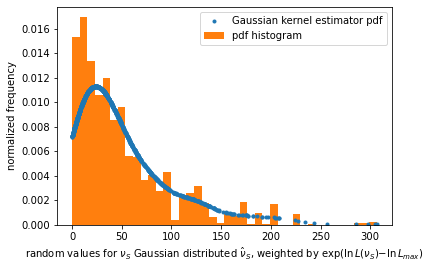

In [25]:
nu_S_random = np.random.exponential(scale=50, size= 1000)
kde = gaussian_kde(nu_S_random, weights = func_of_LLH(LLH_random,lnL_max))
pdf = kde(nu_S_random)
plt.plot(nu_S_random, pdf ,".", label = "Gaussian kernel estimator pdf")
plt.hist(nu_S_random, bins = 40, density=True,  weights= func_of_LLH(LLH_random,lnL_max), label = "pdf histogram")
plt.xlabel(r"random values for $\nu_S$ Gaussian distributed $\hat\nu_S$, weighted by $\exp(\ln L(\nu_S) − \ln L_{max})$")
plt.ylabel("normalized frequency")
plt.legend()

8. Considering now the 2D case where we want to estimate both $\nu_S$ and $\nu_B$ , find the maximum likelihood estimates $\hat\nu_S$  and $\hat\nu_B$ .

In [36]:
def neg_LLH_2(param, x):
    nu_S, nu_B = param
    return(-extended_log_likelihood(nu_S, nu_B, x))

In [51]:
nu_S, nu_B = 1,1
optimize = so.minimize(neg_LLH_2, x0=[nu_S, nu_B], args=(data))
print(optimize)

      fun: -2874.751023494282
 hess_inv: array([[ 617.73749576, -426.83601515],
       [-426.83601515,  845.22887518]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 33
     njev: 35
   status: 0
  success: True
        x: array([175.40414786, 428.60126079])


In [69]:
nu_S_hat_2, nu_B_hat  = optimize["x"][0], optimize["x"][1]
lnL_max_2 = -optimize["fun"]

9. Make a graphical representation of the joint posterior pdf $f(\hat\nu_S,\hat\nu_B|\text{data})$, assuming a uniform prior $P (\nu_S , \nu_B ) = 1$. You may use a 2D histogram (matplotlib.pyplot.hist2d).


Text(0, 0.5, 'random values for $\\nu_B$ around $\\hat\\nu_B$')

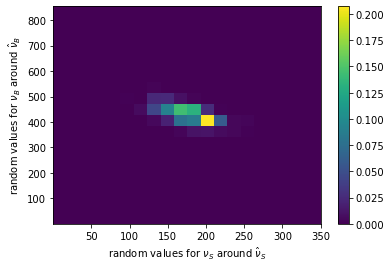

In [81]:
nu_S_random = np.random.uniform(0, 2*nu_S_hat_2, 1000)
nu_B_random = np.random.uniform(0, 2*nu_B_hat, 1000)
LLH_random = []

for i in range(len(nu_S_random)):
        LLH_random.append(extended_log_likelihood(nu_S_random[i],  nu_B_random[i], data.x))
weights =  func_of_LLH(LLH_random, lnL_max_2)/sum(func_of_LLH(LLH_random, lnL_max_2))

plt.hist2d(nu_S_random, nu_B_random, bins = 20, weights= weights)

plt.colorbar()
plt.xlabel(r"random values for $\nu_S$ around $\hat\nu_S$")
plt.ylabel(r"random values for $\nu_B$ around $\hat\nu_B$")

Text(0, 0.5, 'random values for $\\nu_B$ around $\\hat\\nu_B$')

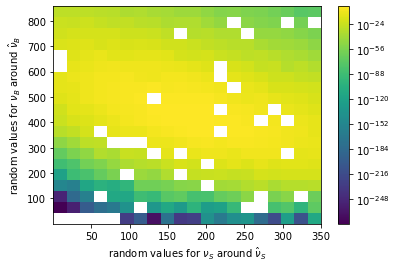

In [80]:
#logarithmic
plt.hist2d(nu_S_random, nu_B_random, bins = 20, weights= weights, norm=matplotlib.colors.LogNorm())

plt.colorbar()
plt.xlabel(r"random values for $\nu_S$ around $\hat\nu_S$")
plt.ylabel(r"random values for $\nu_B$ around $\hat\nu_B$")

10. An independent measurement may provide information on $\nu_B$  with some uncertainty, which one would account for using a non-uniform prior pdf. Make a graphical representation of the joint posterior pdf $f(\hat\nu_S,\hat\nu_B|\text{data})$, assuming a uniform (improper) prior for $\nu_S$ , but a Gaussian prior for $\nu_B$  with a mean 420.7 and a standard deviation 10. You will assume that $\nu_S$  and $\nu_B$  are independent a priori, i.e. $\pi(\nu_S,\nu_B) = \pi(\nu_S)pi(\nu_B)$.

Text(0, 0.5, 'random values for $\\nu_B$ around $\\hat\\nu_B$')

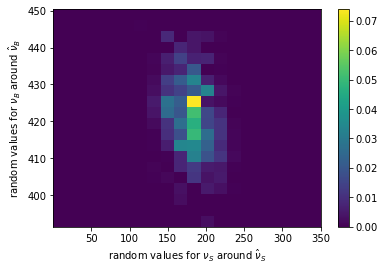

In [82]:
nu_S_random = np.random.uniform(0, 2*nu_S_hat_2, 1000)
nu_B_random = np.random.normal(loc=420.7, scale=10, size= 1000)
LLH_random = []

for i in range(len(nu_S_random)):
        LLH_random.append(extended_log_likelihood(nu_S_random[i],  nu_B_random[i], data.x))
weights =  func_of_LLH(LLH_random, lnL_max_2)/sum(func_of_LLH(LLH_random, lnL_max_2))

plt.hist2d(nu_S_random, nu_B_random, bins = 20, weights= weights)

plt.colorbar()
plt.xlabel(r"random values for $\nu_S$ around $\hat\nu_S$")
plt.ylabel(r"random values for $\nu_B$ around $\hat\nu_B$")

Text(0, 0.5, 'random values for $\\nu_B$ around $\\hat\\nu_B$')

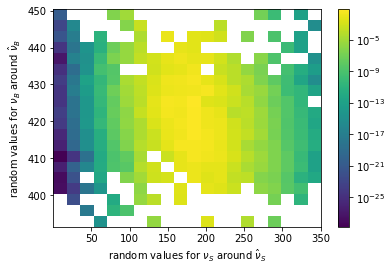

In [83]:
#logarithmic
plt.hist2d(nu_S_random, nu_B_random, bins = 20, weights= weights, norm=matplotlib.colors.LogNorm())

plt.colorbar()
plt.xlabel(r"random values for $\nu_S$ around $\hat\nu_S$")
plt.ylabel(r"random values for $\nu_B$ around $\hat\nu_B$")